In [16]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
class Value:
    def __init__(self, data, _prev = (), _op='', label=''):
        self.data = data
        self._prev = set(_prev) 
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"{self.data}"
    
    def __add__(self, other):
        return Value(self.data + other.data, (self, other), '+')
    
    def __sub__(self, other):
        return Value(self.data - other.data, (self, other), '-')
    
    def __mul__(self, other):
        return Value(self.data * other.data, (self, other), '*')
    
    def __div__(self, other):
        return Value(self.data/ other.data, (self, other), '/')

In [33]:
x = Value(3.0, label = 'x')
y = Value(-10, label = 'y')
z = Value(4.0, label = 'z')

a = x*y
a.label = 'a'

b = a + z
b.label = 'b'

In [34]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for parent in v._prev:
        edges.add((parent, v))
        build(parent)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f}" % (n.label, n.data), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

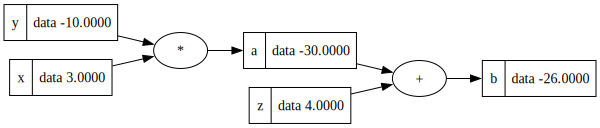

In [36]:
draw_dot(b)